In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=7fafc280047773bc08e43814a3f2256988b4cc9f3d443ed3ca6ceae242acfe85
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.3 GB  | Proc size: 159.9 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [0]:
import tensorflow as tf

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chir0313","key":"a21bed5e6c5627830a5e30b670ef201e"}'}

In [6]:
# Let's make sure the kaggle.json file is present.
!ls -lha /content/kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 May 13 11:07 /content/kaggle.json


In [7]:
#!kaggle datasets download -d edited
!kaggle datasets download -d paultimothymooney/kermany2018
#!kaggle datasets download -d gaborfodor/keras-pretrained-models


100% 10.8G/10.8G [04:15<00:00, 56.2MB/s]
100% 10.8G/10.8G [04:15<00:00, 45.7MB/s]


In [0]:
!unzip "/content/kermany2018" -d /content

In [0]:
!rm kermany2018.zip

In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle

Using TensorFlow backend.


In [0]:
path ="/content/OCT2017 /train"
test_ratio=0.2
val_ratio=0.2
image_size=(128,128,3)

In [4]:
myList = os.listdir(path)
print("Total Number of Classes Detected :",len(myList))

Total Number of Classes Detected : 4


In [0]:
noOfclasses= len(myList)

In [6]:
print(myList)

['DRUSEN', 'DME', 'NORMAL', 'CNV']


In [7]:
print("Importing Classes...")

Importing Classes...


In [8]:
images=[]
classNo=[]
CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
for x in myList:
  myPicList = os.listdir(path+"/"+str(x))
  for y in myPicList:
    curImg = cv2.imread(path+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    images.append(curImg)
    classNo.append(CATEGORIES.index(x))
  print(x,end=" ")

DRUSEN DME NORMAL CNV 

In [9]:
print(len(images))
print(len(classNo))

83484
83484


In [0]:
images = np.array(images)
classNo = np.array(classNo)

In [11]:
print(images.shape)
print(classNo.shape)

(83484, 128, 128, 3)
(83484,)


#Spliting Data

In [0]:
x_train,x_test,y_train,y_test = train_test_split(images,classNo,test_size=test_ratio,random_state = 42)
x_train,x_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size=val_ratio,random_state = 42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(53429, 128, 128, 3)
(16697, 128, 128, 3)
(13358, 128, 128, 3)


In [0]:
numofSamples=[]
for x in range(0,noOfclasses):
  numofSamples.append(len(np.where(y_train==x)[0]))

In [15]:
print(numofSamples)

[16750, 23808, 7328, 5543]


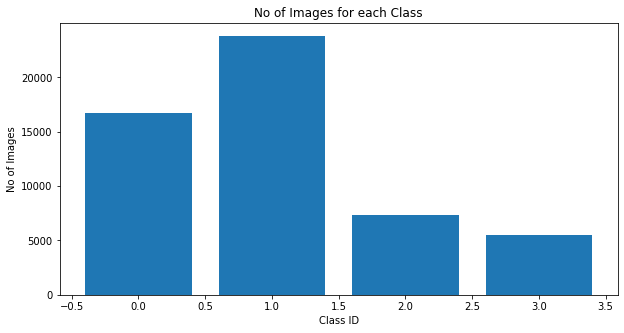

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfclasses),numofSamples)
plt.title('No of Images for each Class')
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

In [0]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #img = cv2.equalizeHist(img)
    #img = img/.255
    return img

Before Preprocess


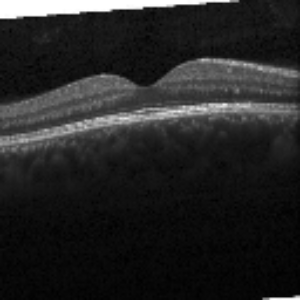

Preprocessed Image


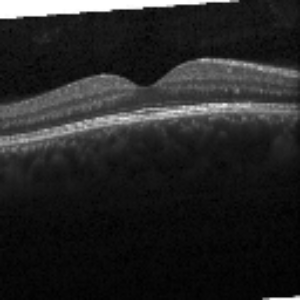

In [18]:
from google.colab.patches import cv2_imshow
img = preProcessing(x_train[0])
img = cv2.resize(img,(300,300))
print("Before Preprocess")
cv2_imshow(cv2.resize(x_train[0],(300,300)))
print("Preprocessed Image")
cv2_imshow(img)
#cv2.waitKey(0)

In [19]:
print(x_train[0].shape)
x_train = np.array(list(map(preProcessing,x_train)))
print(x_train[0].shape)

(128, 128, 3)
(128, 128)


In [20]:
print(x_test[0].shape)
x_test = np.array(list(map(preProcessing,x_test)))
print(x_test[0].shape)

(128, 128, 3)
(128, 128)


In [21]:
print(x_validation[0].shape)
x_validation = np.array(list(map(preProcessing,x_validation)))
print(x_validation[0].shape)

(128, 128, 3)
(128, 128)


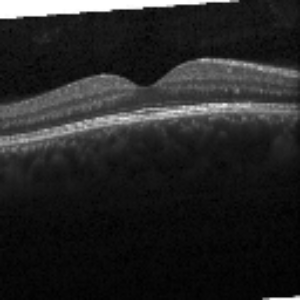

Preprocessed Image


In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(x_train[0],(300,300)))
print("Preprocessed Image")

#cv2.waitKey(0)

In [23]:
print(x_train.shape)

(53429, 128, 128)


In [24]:
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print(x_train.shape)

(53429, 128, 128)
(53429, 128, 128, 1)


In [0]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)

In [0]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [0]:
dataGen.fit(x_train)


In [0]:
y_train = to_categorical(y_train,noOfclasses)
y_test = to_categorical(y_test,noOfclasses)
y_validation = to_categorical(y_validation,noOfclasses)

In [0]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (4,4)
  sizeoffilter3 = (3,3)
  sizeofpool = (2,2)
  node=5000

  model = Sequential();
  model.add((Conv2D(filters,sizeoffilter1,input_shape=(image_size[0],image_size[1],1)
  ,activation="relu")))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  #model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter1,activation="relu")))
  #model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Conv2D(filters,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add((Conv2D(filters//2,sizeoffilter3,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(noOfclasses,activation="softmax"))

  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model
  
model=model()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 60)      1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 60)      90060     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 117, 117, 30)      28830     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 114, 114, 30)      14430     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 57, 57, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 60)       

In [0]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [32]:
batchsize=16
epochs=10
stepsperepoch= 3000

history = model.fit_generator(dataGen.flow(x_train,y_train,batch_size=batchsize),
                    steps_per_epoch=stepsperepoch,
                    epochs=epochs,
                    validation_data = (x_validation,y_validation),
                    shuffle=1,
                    workers=4)

Epoch 1/10
3000/3000 [==============================] - 128s 43ms/step - loss: 0.7696 - accuracy: 0.7182 - val_loss: 0.5973 - val_accuracy: 0.7897
Epoch 2/10
3000/3000 [==============================] - 120s 40ms/step - loss: 0.5890 - accuracy: 0.7872 - val_loss: 0.4543 - val_accuracy: 0.8388
Epoch 3/10
3000/3000 [==============================] - 120s 40ms/step - loss: 0.4887 - accuracy: 0.8311 - val_loss: 0.4479 - val_accuracy: 0.8539
Epoch 4/10
3000/3000 [==============================] - 120s 40ms/step - loss: 0.4231 - accuracy: 0.8582 - val_loss: 0.3082 - val_accuracy: 0.8943
Epoch 5/10
3000/3000 [==============================] - 119s 40ms/step - loss: 0.4198 - accuracy: 0.8598 - val_loss: 0.2995 - val_accuracy: 0.9017
Epoch 6/10
3000/3000 [==============================] - 120s 40ms/step - loss: 0.4126 - accuracy: 0.8641 - val_loss: 0.3344 - val_accuracy: 0.8849
Epoch 7/10
3000/3000 [==============================] - 119s 40ms/step - loss: 0.4050 - accuracy: 0.8661 - val_loss: 0

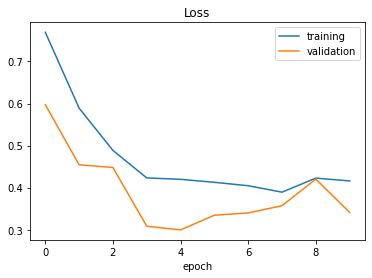

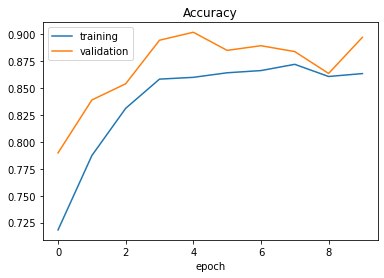

In [33]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()


In [34]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

Test Score =  0.36878702417573805
Test Accuracy =  0.8892016410827637


In [0]:
model.save('/content/drive/My Drive/Data Mining/model156_3000trained10.model')

In [36]:
cp  -r "/gdrive/My Drive/Digit Prediction/model_4000trained30.model" "/content"

cp: cannot stat '/gdrive/My Drive/Digit Prediction/model_4000trained30.model': No such file or directory


In [0]:
out=open("/content/model_trained30.p","wb")
pickle.dump(model,out)
out.close()

In [0]:
import keras
model = keras.models.load_model('/content/drive/My Drive/Data Mining/model_3000trained10.model')

In [42]:
from skimage.io import imread

CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
correct=0
false=0
path="/content/OCT2017 /test"
for x in CATEGORIES:
  myPicList = os.listdir(path+"/"+str(x))
  for y in myPicList:
    image=imread(path+"/"+str(x)+"/"+y)
    img = np.asarray(image,dtype=np.uint8)
    img = cv2.resize(img,(128,128))
    #cv2_imshow(img)
    img = img.reshape(1,128,128,1)
    classIndex = int(model.predict_classes(img))
    predictions = model.predict(img)
    probVal= np.amax(predictions)
    #print("Correct: ",x,"Predicted: ",CATEGORIES[classIndex],probVal)
    if(CATEGORIES[classIndex]==x):
      correct+=1
    else:
      false+=1
print(correct/(correct+false))

0.9597107438016529


In [43]:
from skimage.io import imread

CATEGORIES = ['NORMAL',"CNV","DME","DRUSEN"]
correct=0
false=0
path="/content/OCT2017 /val"
for x in CATEGORIES:
  myPicList = os.listdir(path+"/"+str(x))
  for y in myPicList:
    image=imread(path+"/"+str(x)+"/"+y)
    img = np.asarray(image,dtype=np.uint8)
    img = cv2.resize(img,(128,128))
    #cv2_imshow(img)
    img = img.reshape(1,128,128,1)
    classIndex = int(model.predict_classes(img))
    predictions = model.predict(img)
    probVal= np.amax(predictions)
    #print("Correct: ",x,"Predicted: ",CATEGORIES[classIndex],probVal)
    if(CATEGORIES[classIndex]==x):
      correct+=1
    else:
      false+=1
print(correct/(correct+false))

1.0
